Epoch 0, loss = 0.223
generated: [[[0.50859976 0.5089959  0.5300177 ]
  [0.5628594  0.5514197  0.42184967]
  [0.37706158 0.5181322  0.587228  ]
  ...
  [0.45508197 0.55174154 0.5321879 ]
  [0.47349668 0.59972185 0.61085016]
  [0.5550267  0.6080085  0.50843966]]

 [[0.479375   0.51987773 0.5901441 ]
  [0.48534068 0.48627785 0.5783075 ]
  [0.517061   0.43066862 0.65918624]
  ...
  [0.5345037  0.6264733  0.51887864]
  [0.48198763 0.5243865  0.6546874 ]
  [0.4444354  0.56880856 0.6645637 ]]

 [[0.56820524 0.550718   0.5260118 ]
  [0.5056299  0.41121727 0.53198344]
  [0.3861905  0.5496601  0.5856207 ]
  ...
  [0.4450979  0.5660602  0.52284205]
  [0.5063103  0.48713794 0.4684346 ]
  [0.5864674  0.47946754 0.58619756]]

 ...

 [[0.5160261  0.47474155 0.54431903]
  [0.5456223  0.4296945  0.5808396 ]
  [0.45220432 0.5730084  0.59032565]
  ...
  [0.44142586 0.5023514  0.6210786 ]
  [0.4820093  0.50404835 0.51008743]
  [0.5533644  0.5536356  0.5559418 ]]

 [[0.43717188 0.57040036 0.56804854]
  [0

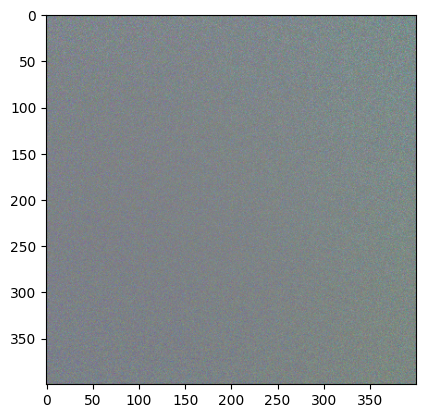

Epoch 100, loss = 0.132
generated: [[[0.23318815 0.23700432 0.25320327]
  [0.27649337 0.2811449  0.28418303]
  [0.41289714 0.41019654 0.409248  ]
  ...
  [0.36649343 0.36700827 0.36444047]
  [0.43042368 0.42790288 0.41900384]
  [0.4107747  0.41148517 0.40147683]]

 [[0.18444347 0.18418312 0.20939516]
  [0.25616086 0.25628096 0.25873098]
  [0.33929542 0.33645526 0.33456072]
  ...
  [0.40178454 0.39995897 0.39454702]
  [0.32878244 0.3318032  0.33186558]
  [0.4271815  0.42471015 0.41661707]]

 [[0.287155   0.28938624 0.3026009 ]
  [0.23913579 0.24406102 0.26204458]
  [0.24460816 0.2426624  0.26195836]
  ...
  [0.39594156 0.39422286 0.38902384]
  [0.43787232 0.43505082 0.42518628]
  [0.34571254 0.34135807 0.34886846]]

 ...

 [[0.24288951 0.25454968 0.2581781 ]
  [0.18025611 0.18122947 0.17911331]
  [0.1781506  0.17597485 0.17514713]
  ...
  [0.1722857  0.16779937 0.16895989]
  [0.17657901 0.171215   0.18183468]
  [0.1845051  0.1746666  0.16430198]]

 [[0.17146522 0.17102244 0.17521705]
  

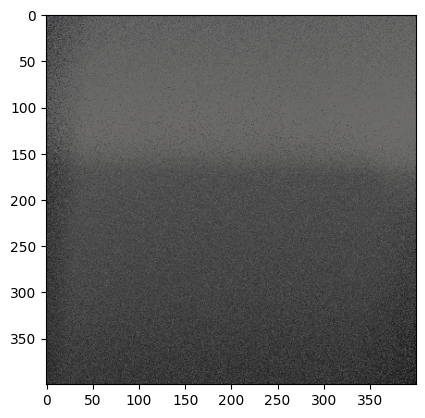

Epoch 200, loss = 0.129
generated: [[[0.42870942 0.42744377 0.42764446]
  [0.2760824  0.27853253 0.27672726]
  [0.23667398 0.23814754 0.23795812]
  ...
  [0.38825688 0.38553944 0.37552303]
  [0.41168034 0.41110608 0.41104034]
  [0.40772617 0.4063211  0.40641773]]

 [[0.34189203 0.34015173 0.3407892 ]
  [0.27758747 0.27748582 0.27862185]
  [0.17377293 0.17628235 0.17909992]
  ...
  [0.36404192 0.36496627 0.365323  ]
  [0.3867069  0.38640863 0.38722888]
  [0.33259356 0.3306436  0.33108595]]

 [[0.3400372  0.34006914 0.3417941 ]
  [0.24525036 0.24392943 0.23074159]
  [0.30737236 0.3075122  0.30937687]
  ...
  [0.29311273 0.28907886 0.27148032]
  [0.40872747 0.40771797 0.40820414]
  [0.40267733 0.4024078  0.4024325 ]]

 ...

 [[0.21289414 0.21203741 0.21135832]
  [0.20443948 0.2033219  0.20182261]
  [0.19022717 0.18805341 0.18916872]
  ...
  [0.20658924 0.20417823 0.2040206 ]
  [0.07498944 0.0790699  0.07849479]
  [0.09839975 0.09678467 0.09669705]]

 [[0.27600518 0.29570195 0.2960711 ]
  

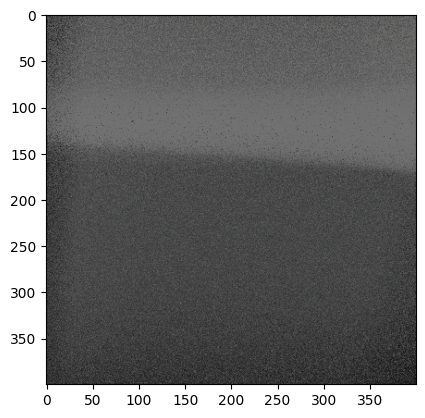

KeyboardInterrupt: 

In [8]:
import torch
import torchvision.transforms as transforms
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import pdb
import numpy as np

# params
crop_size = 400

# get image
img = imageio.imread('cat.jpg')[...,:3]/255.
# plt.imshow(img)
# plt.show()

# convert to tensor
img_tensor = torch.Tensor(img).permute(2, 0, 1)
# print(img_tensor)
img_cropped = transforms.CenterCrop(crop_size)(img_tensor)
img_flatten = torch.reshape(img_cropped, (crop_size * crop_size, 3))

# test
# img_crop = img_cropped.permute(1, 2, 0)
# img_crop.detach().numpy()
# img_crop.shape


# plt.imshow(img_crop)
# plt.show()

# create the mesh grid
xy_range = list(map(lambda x: (x / (crop_size - 1) * 2) - 1, range(crop_size)))
xy_range_tensor = torch.Tensor(xy_range)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor, indexing='ij')
xy_coord_tensor = torch.stack((x_grid, y_grid), dim= -1)
xy_flatten = torch.reshape(xy_coord_tensor, (crop_size * crop_size, 2))



# pdb.set_trace()


import torch.nn as nn


# mlp
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # self.flatten = nn.Flatten()

        self.neural_net = nn.Sequential(
            
            # layer 1
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 2
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 3
            nn.Linear(hidden_features, out_features),
            # nn.Tanh()
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.neural_net(x)

# declare network
net = MLP(in_features=2, hidden_features=50, out_features=3)

model = net

# print(model)

import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# params
learning_rate = 0.01
num_epochs = 501

# set the target
target = img_flatten

# optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    generated = model(xy_flatten)

    # loss = criterion(generated, target)
    loss = nn.functional.l1_loss(target, generated)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        generated = generated.view((crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        print(f'generated: {generated}')
        generated = (generated * 255).astype(np.uint8)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        # print(generated)
        plt.imshow(generated)
        plt.show()
model.eval()
